In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
dataset = pd.read_csv('Task1+copy.csv', encoding = 'latin-1')

In [7]:
dataset.shape

(300, 8)

In [11]:
dataset.head(6)

,Unnamed: 0,index,topic,category,tag,url,reply,views
0,0,0,Public calendar for SmartThings developer events,Groups & Events,NaN,https://community.smartthings.com/t/public-cal...,14,8817
1,1,1,Power Outage Causes Hub Format Error,General Discussion,NaN,https://community.smartthings.com/t/power-outa...,5,60
2,2,2,Custom Capability and CLI Developer Preview,Announcements,"devicetype ,Â ...",https://community.smartthings.com/t/custom-cap...,19,1204
3,3,3,'Fibaro Z-Wave FGK-101 Temperature & Door/Wind...,Community Created Device Types,"fibaro ,Â ...",https://community.smartthings.com/t/fibaro-z-w...,527,30566
4,4,4,FortrezZ Water Flow Meter,Devices & Integrations,"watermeter ,Â ...",https://community.smartthings.com/t/fortrezz-w...,379,14396
5,5,5,Hub Firmware Beta 0.31.x,Hub Firmware Beta,NaN,https://community.smartthings.com/t/hub-firmwa...,66,1322


In [12]:
dataset.isnull().mean().sort_values(ascending = False) #we get the percentage of missing values from every column

tag           0.466667
views         0.000000
reply         0.000000
url           0.000000
category      0.000000
topic         0.000000
index         0.000000
Unnamed: 0    0.000000
dtype: float64

In [13]:
dataset['tag'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                   140
rooms                    ,Â                     smartrules                    ,Â                     microlocation                    ,Â                     project_sensors                    ,Â                     manager         10
devicetype                    ,Â                     dth_lighting                    ,Â                     dth_powermeter                    ,Â                     colorcontrol                                                      10
motionsensor                    ,Â                     thermostat                    ,Â                     temperature                    ,Â                     smartapp_hvac                    ,Â                     rboyapps     10
fibaro                    ,Â                     dth_sensors    

In [14]:
dataset.dtypes

Unnamed: 0     int64
index          int64
topic         object
category      object
tag           object
url           object
reply          int64
views          int64
dtype: object

In [15]:
dataset.drop(columns = ['Unnamed: 0'], inplace = True)

In [16]:
dataset.head(4)

,index,topic,category,tag,url,reply,views
0,0,Public calendar for SmartThings developer events,Groups & Events,NaN,https://community.smartthings.com/t/public-cal...,14,8817
1,1,Power Outage Causes Hub Format Error,General Discussion,NaN,https://community.smartthings.com/t/power-outa...,5,60
2,2,Custom Capability and CLI Developer Preview,Announcements,"devicetype ,Â ...",https://community.smartthings.com/t/custom-cap...,19,1204
3,3,'Fibaro Z-Wave FGK-101 Temperature & Door/Wind...,Community Created Device Types,"fibaro ,Â ...",https://community.smartthings.com/t/fibaro-z-w...,527,30566


In [17]:
dataset.isnull().mean().sort_values(ascending = False).sum()

0.4666666666666667

In [18]:
dataset['category']

0                     Groups & Events
1                  General Discussion
2                       Announcements
3      Community Created Device Types
4              Devices & Integrations
                    ...              
295       Community Created SmartApps
296    Community Created Device Types
297       Community Created SmartApps
298                General Discussion
299                General Discussion
Name: category, Length: 300, dtype: object

In [35]:
#we loop through the whole dataset to get rid of the NaN values
for column in dataset:
    if type(dataset[column]) == 'object':
        dataset[column] = dataset[column].fillna(value = 'unknown')
    else:
        dataset[column] = dataset[column].fillna(value = 0)

In [36]:
dataset.isnull().mean().sort_values(ascending = False)

views       0.0
reply       0.0
url         0.0
tag         0.0
category    0.0
topic       0.0
index       0.0
dtype: float64

In [37]:
dataset.isnull().mean().sort_values(ascending = False).sum()

0.0

In [32]:
dataset.isnull().sum().sum()

0

In [39]:
dataset.head()

,index,topic,category,tag,url,reply,views
0,0,Public calendar for SmartThings developer events,Groups & Events,0,https://community.smartthings.com/t/public-cal...,14,8817
1,1,Power Outage Causes Hub Format Error,General Discussion,0,https://community.smartthings.com/t/power-outa...,5,60
2,2,Custom Capability and CLI Developer Preview,Announcements,"devicetype ,Â ...",https://community.smartthings.com/t/custom-cap...,19,1204
3,3,'Fibaro Z-Wave FGK-101 Temperature & Door/Wind...,Community Created Device Types,"fibaro ,Â ...",https://community.smartthings.com/t/fibaro-z-w...,527,30566
4,4,FortrezZ Water Flow Meter,Devices & Integrations,"watermeter ,Â ...",https://community.smartthings.com/t/fortrezz-w...,379,14396


In [40]:
dataset['tag'].value_counts()

0                                                                                                                                                                                                                                     140
rooms                    ,Â                     smartrules                    ,Â                     microlocation                    ,Â                     project_sensors                    ,Â                     manager         10
motionsensor                    ,Â                     thermostat                    ,Â                     temperature                    ,Â                     smartapp_hvac                    ,Â                     rboyapps     10
fibaro                    ,Â                     dth_sensors                                                                                                                                                                           10
dth_powermeter                    ,Â                     power  

In [41]:
dataset['tag']

0                                                      0
1                                                      0
2      devicetype                    ,Â              ...
3      fibaro                    ,Â                  ...
4      watermeter                    ,Â              ...
                             ...                        
295    smartapp_misc                    ,Â           ...
296                                                    0
297    rooms                    ,Â                   ...
298                                              support
299    sunset                    ,Â                  ...
Name: tag, Length: 300, dtype: object

In [42]:
dataset.describe()

,index,reply,views
count,300.000000,300.000000,300.000000
mean,14.500000,201.800000,9848.066667
std,8.669903,435.142955,15160.715109
min,0.000000,1.000000,10.000000
25%,7.000000,3.000000,60.000000
50%,14.500000,17.000000,809.000000
75%,22.000000,145.000000,14396.000000
max,29.000000,2117.000000,49751.000000


In [43]:
dataset.mean()

index      14.500000
reply     201.800000
views    9848.066667
dtype: float64

In [44]:
plt.figure(figsize = (10.6))

TypeError: from_bounds() argument after * must be an iterable, not float

In [45]:
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

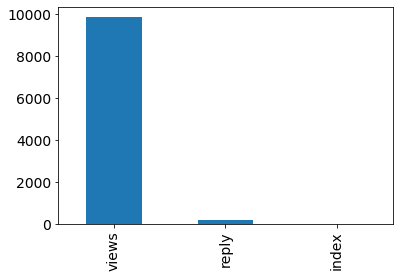

In [49]:
dataset.mean().sort_values(ascending = False).head(6).plot(kind='bar', fontsize=14)

In [50]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>